In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Adagrad

In [15]:
X = np.linspace(0,20)
y = -2 * X + 1

In [16]:
X = X.reshape(-1,1)
X = np.insert(arr=X, values=1, obj=0, axis=1)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.63265306],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.67346939],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.12244898],
       [ 1.        ,  6.53061224],
       [ 1.        ,  6.93877551],
       [ 1.        ,  7.34693878],
       [ 1.        ,  7.75510204],
       [ 1.        ,  8.16326531],
       [ 1.        ,  8.57142857],
       [ 1.        ,  8.97959184],
       [ 1.        ,  9.3877551 ],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.20408163],
       [ 1.        , 10.6122449 ],
       [ 1.        , 11.02040816],
       [ 1.        ,

Text(0, 0.5, 'Outputs')

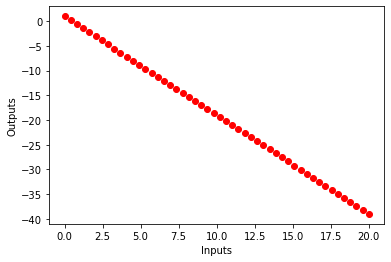

In [17]:
plt.scatter(X[:,1], y, c='r')
plt.xlabel('Inputs')
plt.ylabel('Outputs')

In [44]:
thetas = np.zeros(2)

In [45]:
def adagrad(X, y, thetas, iters, L_rate, epsilon):
    
    loss = []
    
    all_thetas = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    
    for i in range(iters):
        
        h_hypo = X @ thetas
        
        loss_fun = np.linalg.norm((h_hypo - y)) ** 2
        
        loss.append(loss_fun /(2*len(X)))
        
        GD = X.T @ (h_hypo - y)
        
        GD = GD / len(X)
        
        vt = vt + GD**2
        
        thetas = thetas - ((L_rate * GD) / (np.sqrt(vt) + epsilon))
        
        all_thetas[i] = thetas
    
    return thetas, loss ,all_thetas  

In [49]:
thetas_adagrad, loss_adagrad ,all_thetas_adagrad  = adagrad(X, y, thetas, 1000, .2, 1e-8)

In [50]:
predict_vals = X @ thetas_adagrad

In [51]:
from sklearn.metrics import r2_score
r2_score(y, predict_vals)

0.9974233642168426

Text(0, 0.5, 'loss')

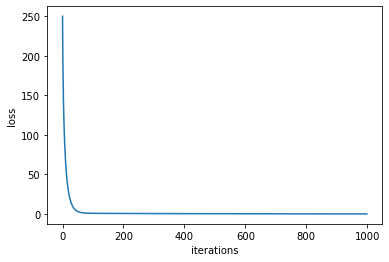

In [165]:
iterations = np.arange(1000)
plt.plot(iterations, loss_adagrad)

plt.xlabel('iterations')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

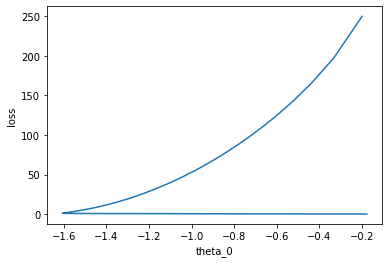

In [166]:
plt.plot(all_thetas_adagrad[:,0], loss_adagrad)

plt.xlabel('theta_0')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

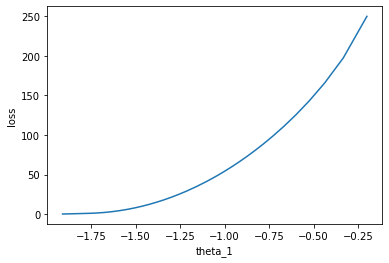

In [167]:
plt.plot(all_thetas_adagrad[:,1], loss_adagrad)

plt.xlabel('theta_1')
plt.ylabel('loss')

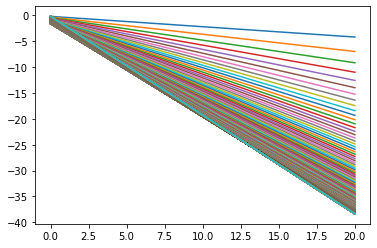

In [56]:
lst = []
for i in range(len(all_thetas_adagrad)):
    h_predected_all = X @ all_thetas_adagrad[i,:]
    lst.append(h_predected_all)
for i in range(len(lst)):
    plt.plot(X[:,1], lst[i])


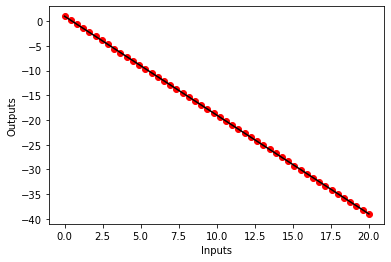

In [173]:
plt.scatter(X[:,1],y, c='r')
plt.plot(X[:,1], lst[-1], c='k');

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.show()

# RMSProp

In [60]:
thetas = np.zeros(2)

In [62]:
def RMSProp(X, y, thetas, iters, L_rate, epsilon, beta):
    
    loss = []
    
    all_thetas = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    
    for i in range(iters):
        
        h_hypo = X @ thetas
        
        loss_fun = np.linalg.norm((h_hypo - y)) ** 2
        
        loss.append(loss_fun /(2*len(X)))
        
        GD = X.T @ (h_hypo - y)
        
        GD = GD / len(X)
        
        vt = beta * vt + (1- beta) * GD**2
        
        thetas = thetas - ((L_rate * GD) / (np.sqrt(vt) + epsilon))
        
        all_thetas[i] = thetas
    
    return thetas, loss ,all_thetas  

In [67]:
thetas_RMS, loss_RMS, all_thetas_RMS = RMSProp(X, y, thetas, 1000, .1, 1e-8, .9)

In [68]:
predict_vals = X @ thetas_RMS

In [69]:
r2_score(y, predict_vals)

0.9971952206026471

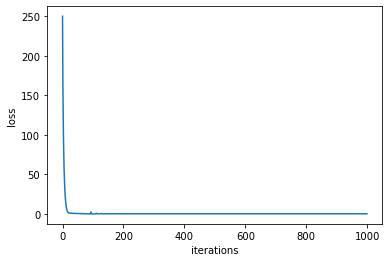

In [174]:
plt.plot(iterations, loss_RMS)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

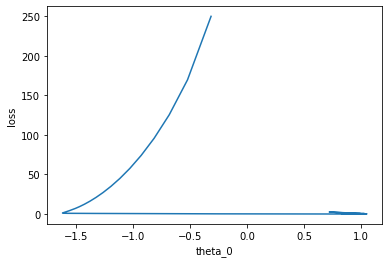

In [175]:
plt.plot(all_thetas_RMS[:,0], loss_RMS)

plt.xlabel('theta_0')
plt.ylabel('loss')
plt.show()

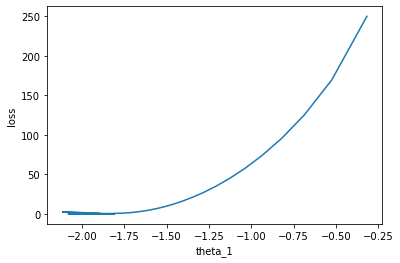

In [176]:
plt.plot(all_thetas_RMS[:,1], loss_RMS)

plt.xlabel('theta_1')
plt.ylabel('loss')
plt.show()

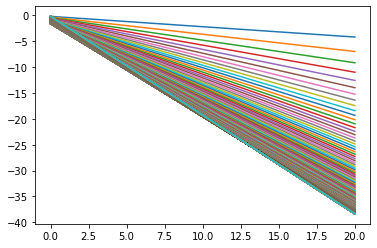

In [73]:
lst = []
for i in range(len(all_thetas_adagrad)):
    h_predected_all = X @ all_thetas_adagrad[i,:]
    lst.append(h_predected_all)
for i in range(len(lst)):
    plt.plot(X[:,1], lst[i])


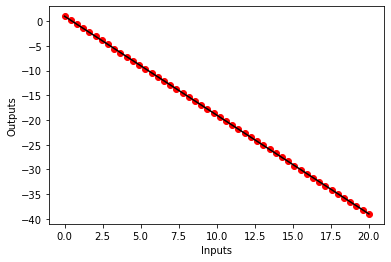

In [177]:
plt.scatter(X[:,1],y, c='r')
plt.plot(X[:,1], lst[-1], c='k');

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.show()

# Adam

In [151]:
thetas = np.zeros(2)

In [152]:
def adam(X, y, thetas, iters, L_rate, epsilon, beta1,beta2):
    
    loss = []
    
    all_thetas = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    mt = 0
    
    for i in range(iters):
        
        h_hypo = X @ thetas
        
        loss_fun = np.linalg.norm((h_hypo - y)) ** 2
        
        loss.append(loss_fun /(2*len(X)))
        
        GD = X.T @ (h_hypo - y)
        
        GD = GD / len(X)
        
        mt = beta1 * mt + (1- beta1) * GD
        
        vt = beta2 * vt + (1- beta2) * GD**2
        
        mt_bias = mt / (1 - beta1**(i+1))
        vt_bias = vt / (1 - beta2**(i+1))
        
        thetas = thetas - ((L_rate * mt_bias) / (np.sqrt(vt_bias) + epsilon))
        
        all_thetas[i] = thetas
    
    return thetas, loss ,all_thetas  

In [153]:
thetas_adam, loss_adam ,all_thetas_adam = adam(X, y, thetas, 1000, .1, 1e-8, 0.9, 0.999)

In [154]:
thetas_adam

array([ 0.99999727, -1.99999979])

In [155]:
predict_vals2 = X @ thetas_adam

In [156]:
r2_score(y, predict_vals2)

0.9999999999999861

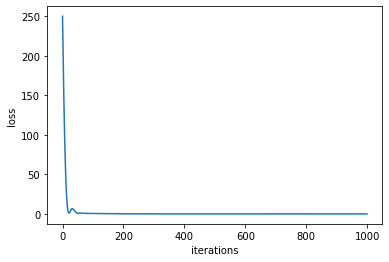

In [178]:
plt.plot(iterations, loss_adam)

plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

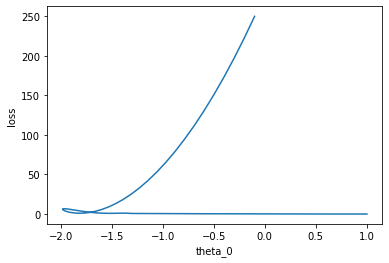

In [179]:
plt.plot(all_thetas_adam[:,0], loss_adam)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.show()

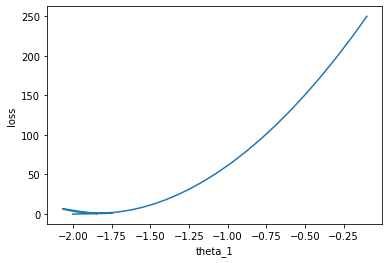

In [180]:
plt.plot(all_thetas_adam[:,1], loss_adam)

plt.xlabel('theta_1')
plt.ylabel('loss')
plt.show()

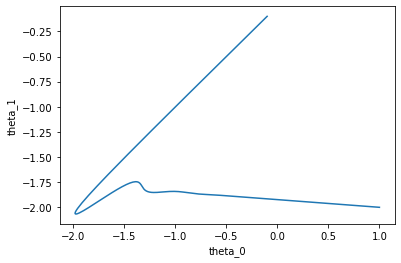

In [181]:
plt.plot(all_thetas_adam[:,0], all_thetas_adam[:,1])

plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

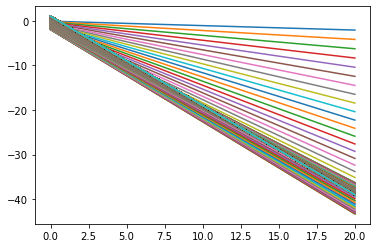

In [163]:
lst = []
for i in range(len(all_thetas_adam)):
    h_predected_all = X @ all_thetas_adam[i,:]
    lst.append(h_predected_all)
for i in range(len(lst)):
    plt.plot(X[:,1], lst[i])


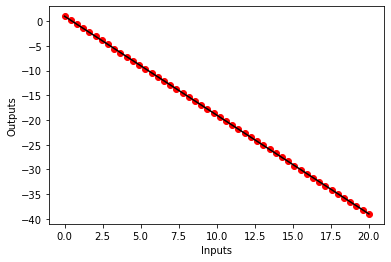

In [182]:
plt.scatter(X[:,1],y, c='r')
plt.plot(X[:,1], lst[-1], c='k');

plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.show()